# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# review

In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,Southampton


## 기본 정보 조회

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


## 조건 조회

`-` 객실 등급(Pclass) 1등급, 나이(Age) 10살 이하 탑승객 조회

In [4]:
df.loc[ map(lambda x,y  : (x==1) & (y <=10), df.Pclass, df.Age), : ]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,151.5500,Southampton
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,151.5500,Southampton
445,446,1,1,"Dodge, Master. Washington",male,4.00,81.8583,Southampton


`-` 객실 등급(Pclass)별 탑승객 수

In [5]:
df.Pclass.value_counts().reset_index()

,Pclass,count
0,3,491
1,1,216
2,2,184


`-` 성별(Sex)이 남자인 탑승객과 여자인 탑승객의 나이를 각각 저장하시오.

In [6]:
_m = df.loc[df.Sex=="male",["Sex","Age"]]
_f = df.loc[df.Sex=="female",["Age","Sex"]]

`-` 나이(Age)에 NaN이 아닌 탑승객을 조회하시오.

In [7]:
df.loc[df.Age ==True, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,39.6875,Southampton
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,11.1333,Southampton
183,184,1,2,"Becker, Master. Richard F",male,1.0,39.0000,Southampton
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,15.7417,Cherbourg
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,46.9000,Southampton
788,789,1,3,"Dean, Master. Bertram Vere",male,1.0,20.5750,Southampton
827,828,1,2,"Mallet, Master. Andre",male,1.0,37.0042,Cherbourg


`-` 아래의 데이터에서 날짜(Date)가, `1973-05-01`, `1973-06-01`, `1973-07-01`.`1973-08-01`을 조회

In [8]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)

In [9]:
d_l = ["1973-05-01", "1973-06-01", "1973-07-01","1973-08-01"]

In [10]:
air.loc[map(lambda x : x in d_l, air.Date),:]

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
31,34,286.0,8.6,78,1973-06-01
61,135,269.0,4.1,84,1973-07-01
92,39,83.0,6.9,81,1973-08-01


`-` 오존 농도 10~20 사이의 데이터를 조회

In [11]:
air.loc[air.Ozone.between(10,20),:].head()

,Ozone,Solar.R,Wind,Temp,Date
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
7,19,99.0,13.8,59,1973-05-08
9,20,194.0,8.6,69,1973-05-10


## 값 변경

[titanic] 승선지역(Embarked)을 변경
* Southamton --> S
* Cherbourg --> C
* Queenstown --> Q

In [12]:
df.Embarked

0      Southampton
1        Cherbourg
2      Southampton
3      Southampton
4      Southampton
          ...     
886    Southampton
887    Southampton
888    Southampton
889      Cherbourg
890     Queenstown
Name: Embarked, Length: 891, dtype: object

In [13]:
df.Embarked=df["Embarked"].map({"Southampton":"S",
                   "Cherbourg" : "C",
                   "Queenstown":"Q"})

In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

`-` [titanic] 운임(Fare)을 다음과 같이 변경

*  <= 30 ==> 'L'

*  <= 100 ==> 'M'

* 100 <   ==> 'H'

In [15]:
bins = [-np.Inf, 30, 100, np.Inf]

In [16]:
labels = list("LMH")

In [17]:
df.Fare = pd.cut(df.Fare,bins = bins, labels= labels)

In [18]:
df.Fare.unique()

['L', 'M', 'H']
Categories (3, object): ['L' < 'M' < 'H']

### np.where($\star\star\star$)

`-` [titanic] 성별(Sex)을 다음과 같이 변경

* female ==> 0

* male ==> 1

In [19]:
df.Sex = np.where(df.Sex=="male",1,0).tolist()

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,L,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,M,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,L,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,M,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,L,S


***

# 시각화

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 데이터 로드

In [22]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/airquality_simple2.csv'
data = pd.read_csv(path)
data['Date'] = pd.to_datetime(data['Date'])
data.dropna(axis = 0, inplace = True)
data.head()

,Ozone,Solar.R,Wind,Temp,Date
0,34.0,286.0,8.6,78.0,1973-06-01
1,29.0,287.0,9.7,74.0,1973-06-02
2,18.0,242.0,16.1,67.0,1973-06-03
3,48.0,186.0,9.2,84.0,1973-06-04
4,49.0,220.0,8.6,85.0,1973-06-05


## 기본 차트 그리기 `matplotlib`

### 기본

<Axes: xlabel='Date'>

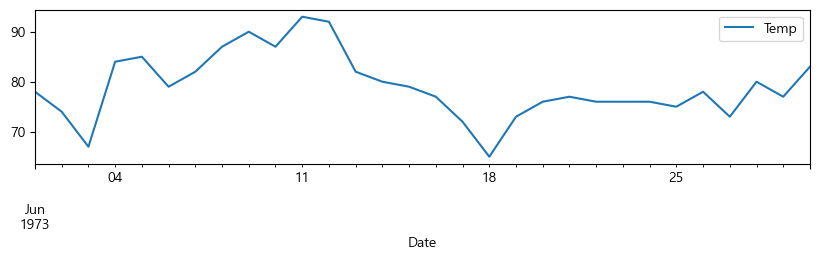

In [23]:
data.plot(x="Date",y="Temp",figsize=(10,2))

<Axes: title={'center': 'Daily Airquality'}, xlabel='Date', ylabel='Ozone'>

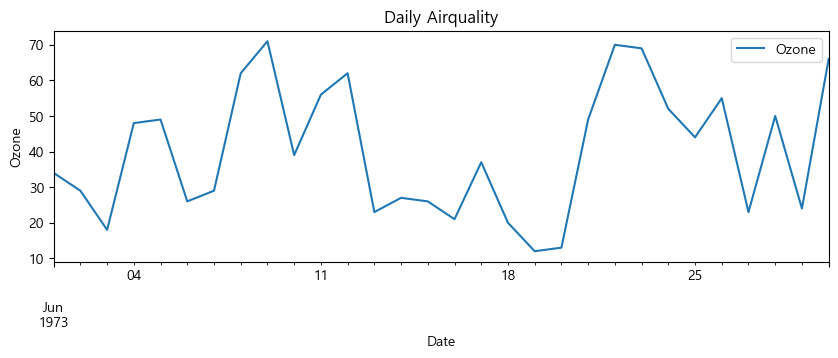

In [24]:
data.plot(x="Date", y= "Ozone",figsize=(10,3),
            xlabel ="Date",ylabel="Ozone",title = "Daily Airquality")

<Axes: title={'center': 'Daily Airquality'}, xlabel='Date', ylabel='Ozone'>

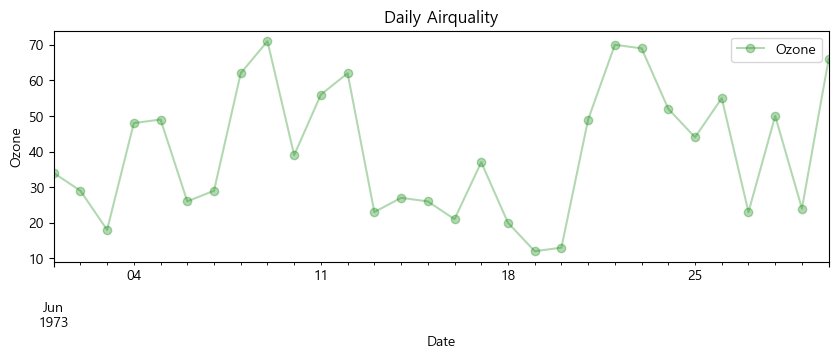

In [25]:
data.plot(x="Date", y= "Ozone",figsize=(10,3),
            xlabel ="Date",ylabel="Ozone",title = "Daily Airquality",
             color = "green",marker="o",alpha=0.3)

### 그래프 겹처그리기

(array([1247., 1251., 1255., 1259., 1263., 1267., 1271., 1275., 1277.]),
 [Text(1247.0, 0, '1973-06-01'),
  Text(1251.0, 0, '1973-06-05'),
  Text(1255.0, 0, '1973-06-09'),
  Text(1259.0, 0, '1973-06-13'),
  Text(1263.0, 0, '1973-06-17'),
  Text(1267.0, 0, '1973-06-21'),
  Text(1271.0, 0, '1973-06-25'),
  Text(1275.0, 0, '1973-06-29'),
  Text(1277.0, 0, '1973-07-01')])

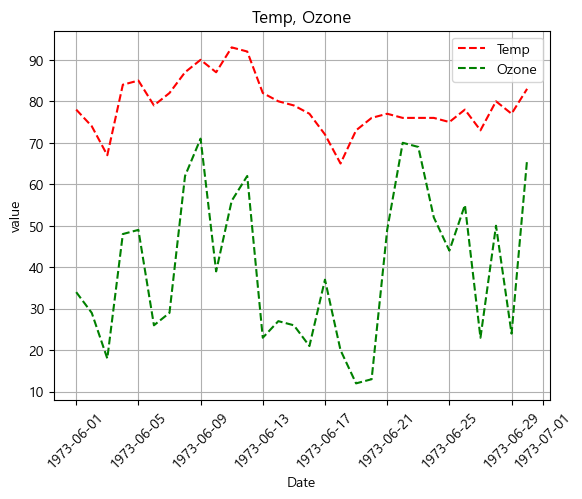

In [26]:
plt.plot(data.Date, data.Temp,"--r")
plt.plot(data.Date, data.Ozone,"--g")
plt.legend(["Temp","Ozone"],loc="upper right")
plt.title("Temp, Ozone")
plt.grid()
plt.xlabel("Date")
plt.ylabel("value")
plt.xticks(rotation=45)

### 그래프 범위

<Axes: xlabel='Date', ylabel='Ozone'>

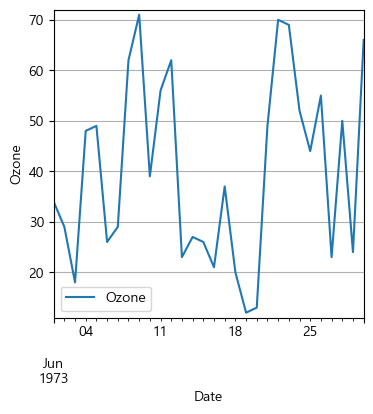

In [27]:
data.plot(x="Date",y="Ozone",
          ylim=(min(data.Ozone)-1,max(data.Ozone)+1),
          grid=True,ylabel="Ozone",figsize=(4,4))

### 다중 그래프 그리기

`-` 방법 1 : 내가 쓰던 방식

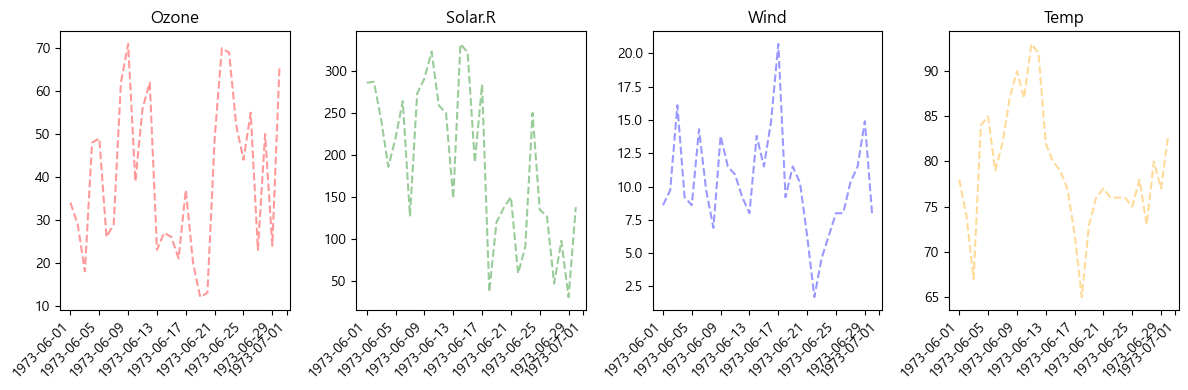

In [46]:
fig,axes =plt.subplots(1,4,figsize=(12,4))
fig.autofmt_xdate(rotation=45)
l1 = data.columns
color = ["red","green","blue","orange"]
for i in range(4) :
    axes[i].plot(data["Date"],data[l1[i]],color=color[i],linestyle="dashed",alpha=0.4)
    axes[i].set_title(l1[i])

fig.tight_layout()

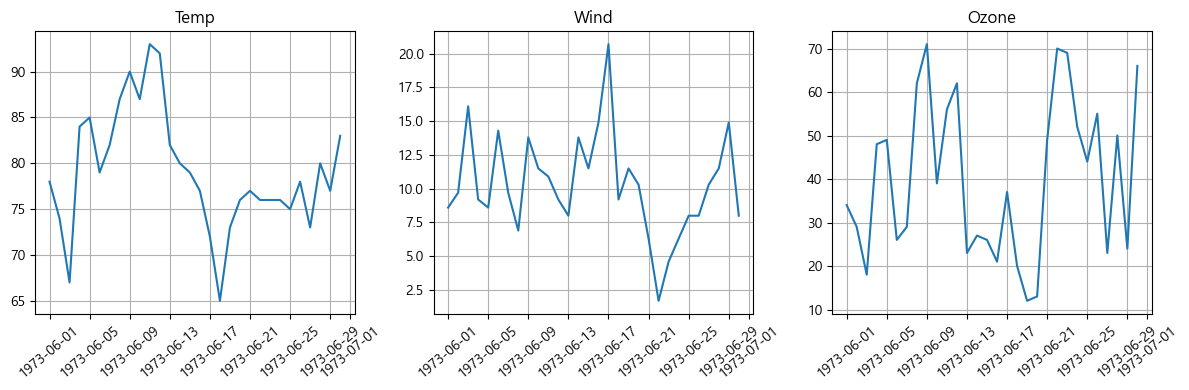

In [37]:
plt.figure(figsize = (12,4))
plt.subplot(1,3,1)
plt.plot('Date', 'Temp', data = data)
plt.title('Temp')
plt.xticks(rotation = 40)
plt.grid()

plt.subplot(1,3,2)
plt.plot('Date', 'Wind', data = data)
plt.title('Wind')
plt.xticks(rotation = 40)
plt.grid()

plt.subplot(1,3,3)
plt.plot('Date', 'Ozone', data = data)
plt.title('Ozone')
plt.xticks(rotation = 40)
plt.grid()

plt.tight_layout() # 그래프간 간격을 적절히 맞추기
plt.show()

***

# 일변량 분석

## 데이터 로드

In [29]:
path1 = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic_simple.csv'
titanic = pd.read_csv(path1)
path2 = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path2)

## 분포 시각화 (hist)

### basic

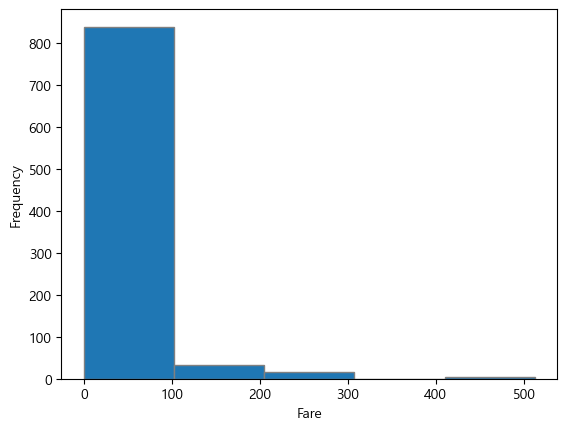

In [30]:
plt.hist(titanic.Fare, bins = 5, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

### 구간개수 조절

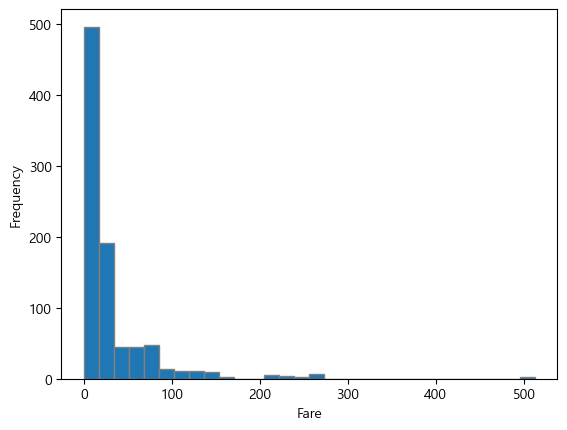

In [31]:
plt.hist(titanic.Fare, bins = 30, edgecolor = 'gray')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'hist of Fare (bins =30)')

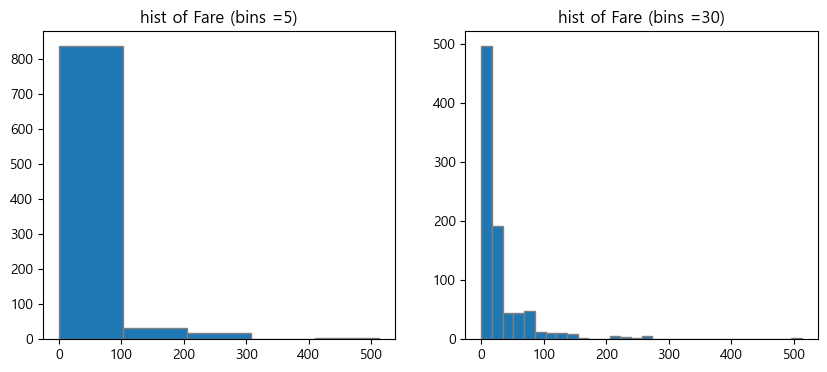

In [32]:
fig, axes = plt.subplots(1,2, figsize= (10,4))

(ax1,ax2)= axes
ax1.hist(titanic.Fare,bins = 5, edgecolor = 'gray')
ax1.set_title("hist of Fare (bins =5)")
ax2.hist(titanic.Fare,bins = 30, edgecolor = 'gray')
ax2.set_title("hist of Fare (bins =30)")

### seaborn

Text(0.5, 1.0, 'hist of Fare (bins =30)')

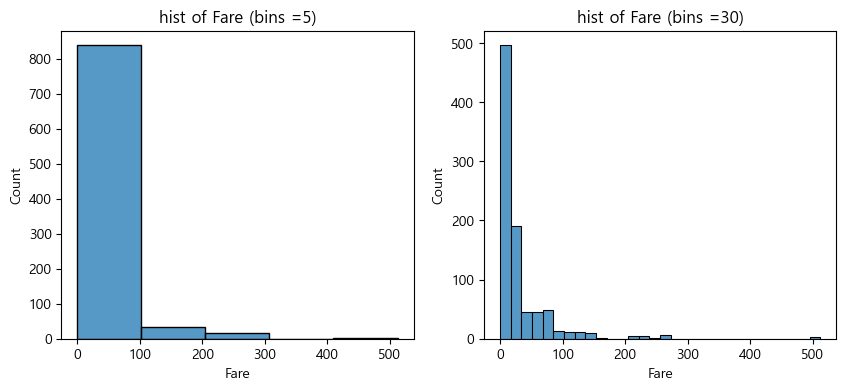

In [33]:
fig, axes = plt.subplots(1,2, figsize= (10,4))

(ax1,ax2)= axes
sns.histplot(x=titanic.Fare,ax=ax1, bins = 5)
sns.histplot(x=titanic.Fare,ax=ax2, bins = 30)
ax1.set_title("hist of Fare (bins =5)")
ax2.set_title("hist of Fare (bins =30)")

***

### 밀도함수 그래프 (kde plot)

`-` 히스토그램의 구간(bin)에 따라 그래프의 모양이 달라진다.

* 밀도함수 그래프는 막대의 너비를 가정하지 않고 모든 점에서 데이터의 밀도(확률)을 추정

* 이는 커널 밀도 방식을 사용하기 때문에 모양이 달라져 발생할 수 있는 혼동을 방지할 수 있다.

<Axes: xlabel='Fare', ylabel='Density'>

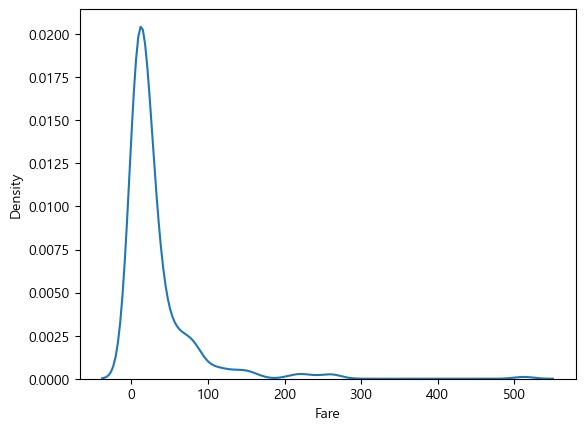

In [59]:
#sns.histplot(titanic["Fare"])
sns.kdeplot(titanic["Fare"])

In [58]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

`-` 위 그래프는 0보다 작은 값도 표현하고 있다.

* 원 데이터의 0보다 작은값은 없지만 컴퓨터에서 확률을 추정하려고 하다보니 위 같이 표현된 것 뿐이다.

`-` 아래와 같이 히스토그램과 같이 그릴 수도 있다.

<Axes: xlabel='Age', ylabel='Count'>

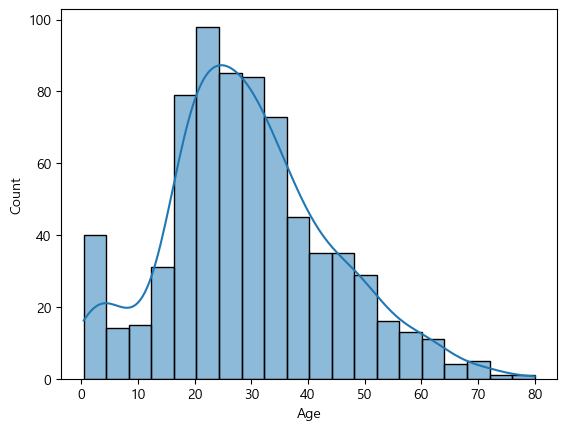

In [62]:
sns.histplot(x=titanic.Age,kde=True)

### boxplot

`-` 주의사항 : `Nan`값이 있으면 그려지지 않는다!

`1` matplot

<Axes: >

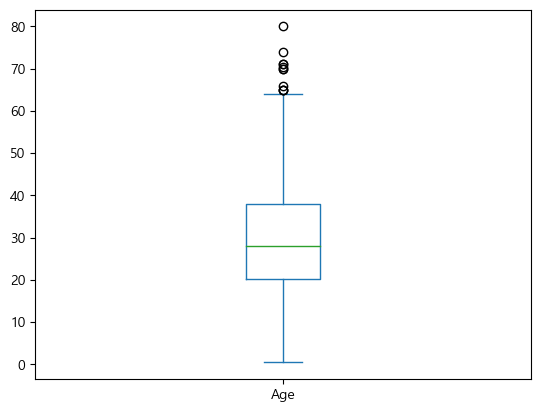

In [68]:
titanic.plot(kind="box", y="Age")

<Axes: >

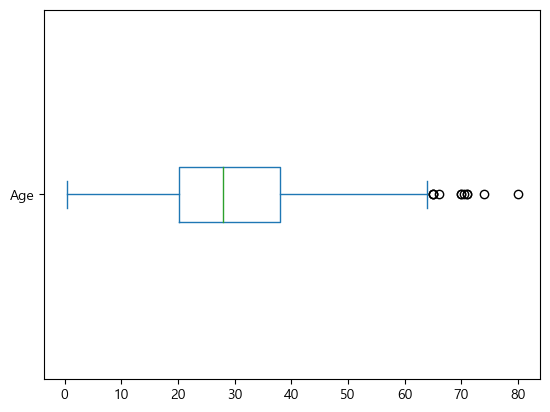

In [69]:
titanic.plot(kind="box", y="Age",vert=False)

`2` seaborn

<Axes: ylabel='Age'>

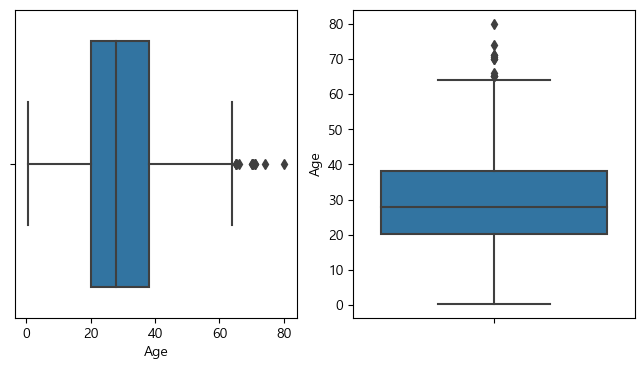

In [81]:
fig, axes = plt.subplots(1,2,figsize=(8,4))
ax1,ax2=axes
sns.boxplot(x = titanic['Age'],ax=ax1)
sns.boxplot(y = titanic['Age'],ax=ax2)

***

# Boston

## import

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
import seaborn as sns

In [85]:
data = load_data("Boston")

In [86]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**변수설명**

> * medv  : 1978 보스턴 주택 가격, 506개 타운의 주택 가격 중앙값 (단위 1,000 달러) <== Target

* crim	범죄율
* zn	25,000 평방피트를 초과 거주지역 비율
* indus	비소매상업지역 면적 비율
* chas	찰스강변 위치(범주 : 강변1, 아니면 0)
* nox	일산화질소 농도
* rm	주택당 방 수
* age	1940년 이전에 건축된 주택의 비율
* dis	직업센터의 거리
* rad	방사형 고속도로까지의 거리
* tax	재산세율
* ptratio	학생/교사 비율
* lstat	인구 중 하위 계층 비율


## 주어진 변수에 대한 hist, boxplot을 그리는 함수 작성

In [102]:
def f(data,var,bins=30) : 
    fig,axes = plt.subplots(1,2, figsize=(8,3))
    ax1,ax2 = axes
    
    sns.histplot(x=data[var],kde = True,ax=ax1,bins=bins)
    ax1.set_title(f"hist of {var}")
    sns.boxplot(x=data[var],ax=ax2)
    ax2.set_title(f"boxplot of {var}")

### medv(집값)

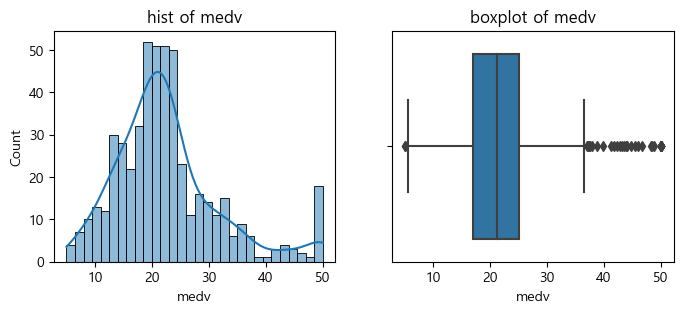

In [103]:
f(data,"medv")

1. 정규분포와 유사한 형태이나 `medv=50`에서 이상치로 보이는 수치들이 보인다.

2. 대부분에 데이터들이 중앙에 모여있다.

### crim(범죄율)

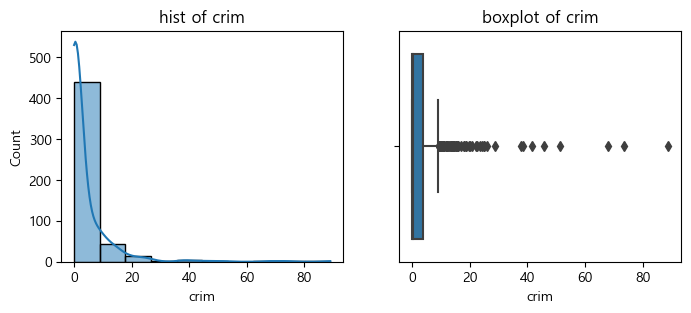

In [104]:
f(data,"crim",bins=10)

1. 범죄율의 분포를 살펴보니 최솟값이 `0.6%` 이며 최댓값은 `89.97%`이다.

2. 대부분은 범죄율이 굉장히 낮다.

3. 박스플랏의 꼬리가길게 늘어짐

4. 로그변환 등을 고려해봐도 괜찮을것 같다.

### lstat(하위계층 비율)

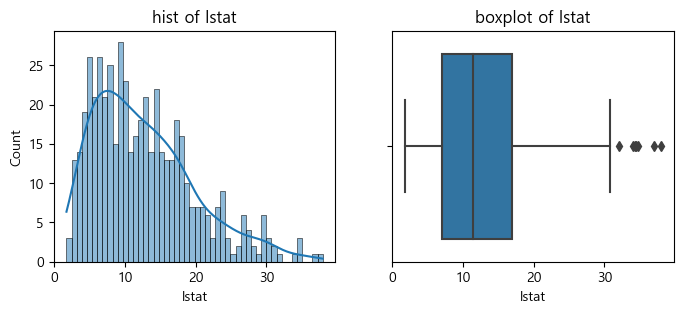

In [112]:
f(data,"lstat",bins=50)

1. 하위계층의 정의가 뭔지.. 궁금해진다.

2. 하위계층의 비율이 대부분 `10 ~ 20%` 구간에 몰려있다.

### ptratio(교사1명당 학생수)

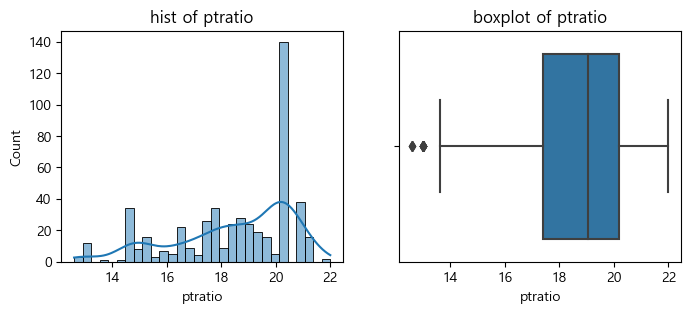

In [107]:
f(data,"ptratio")

1. 교육환경이 좋은 동네는 교사 1명당 학생수가 높나?? $\to$ 이런걸 보고싶을 때가 있으니 역시 다차원 그래프 표현이 필요한 것 같다.

### tax(재산세)

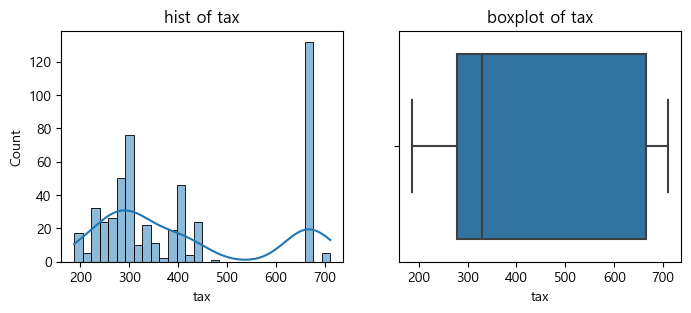

In [106]:
f(data,"tax")

1. 제산세가 굉장히 높은 구간이 있는데 부자동네인가? 라는 생각을 가지게 된다.

2. 또한, 제산세가 높은 구간의 비중이 가장 높은데 재산세에 대한 기준이 궁금해진다.

3. 분포를 살펴본 결과 2개의 분포가 보인다. $\to$ 두 개의 그룹으로 나누어서 살펴보아야 한다.

***

# 범주형 변수의 시각화

## 데이터 전처리

In [129]:
e_table = titanic.Embarked.\
            value_counts(normalize=True).reset_index()
e_table

,Embarked,proportion
0,Southampton,0.724409
1,Cherbourg,0.188976
2,Queenstown,0.086614


`-` 생존률이 매우 낮다.

* 고민 1 : 그럼 구명보트에 가까운사람, 1등석에 탄 사람들만 살았나?? (이런 상황에 대한 도메인 지식이 필요할 때가 있다....)

In [147]:
titanic.Survived.\
            value_counts(normalize=True).\
                    reset_index()

,Survived,proportion
0,0,0.616162
1,1,0.383838


## 시각화 1. bar chart

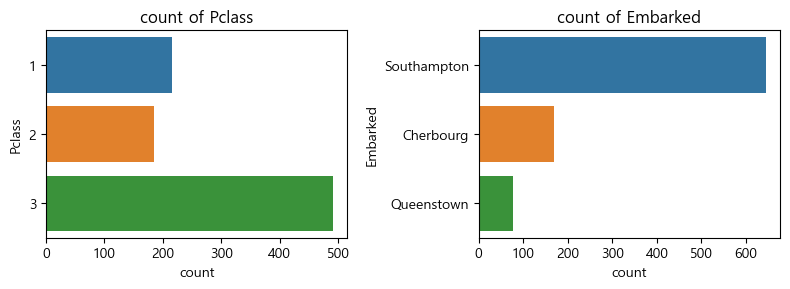

In [162]:
fig,axe = plt.subplots(1,2,figsize=(8,3))
ax1,ax2 =axe
sns.countplot(y= titanic.Pclass,ax=ax1)
ax1.set_title("count of Pclass")
sns.countplot(y= titanic.Embarked,ax=ax2)
ax2.set_title("count of Embarked")
fig.tight_layout()

## 시각화 2. Pie chart 

`-` 범주형 비율을 비교할 때 사용

* 사실 난 그렇게 좋아하지 않음... $\to$ 비율로 먼가 어떤 현상을 설명할 때 직관적으로 와닿지가 않는다...

In [178]:
titanic.Pclass.\
        value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

`-` 기본

<Axes: ylabel='count'>

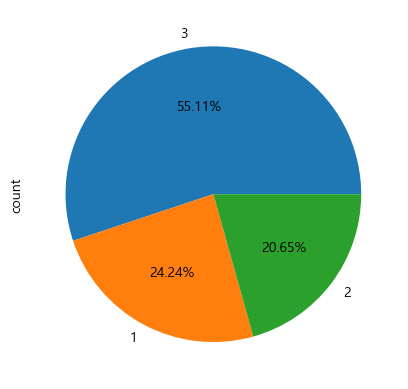

In [180]:
titanic.Pclass.\
        value_counts().\
                plot(kind="pie",y="count",
                     autopct= "%.2f%%")

`-` 시작점과 방향 지정

<Axes: ylabel='count'>

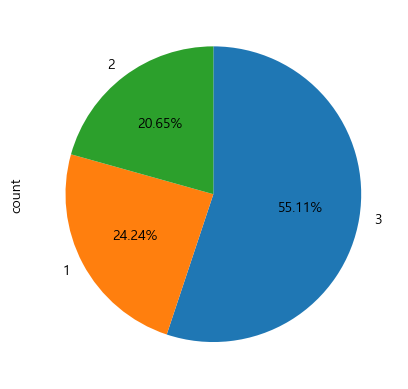

In [184]:
titanic.Pclass.\
        value_counts().\
                plot(kind="pie",y="count",
                     autopct= "%.2f%%", startangle=90,
                    counterclock = False)

***

# Review

In [191]:
data = load_data("Boston")

`-` chas(찰스강변 여부)에 대한 단변량 분석

In [216]:
p_t= data.chas.\
        value_counts(normalize=True).reset_index()
c_t = data.chas.\
        value_counts().reset_index()


,chas,count
0,0,471
1,1,35


Text(0.5, 1.0, 'count of chas')

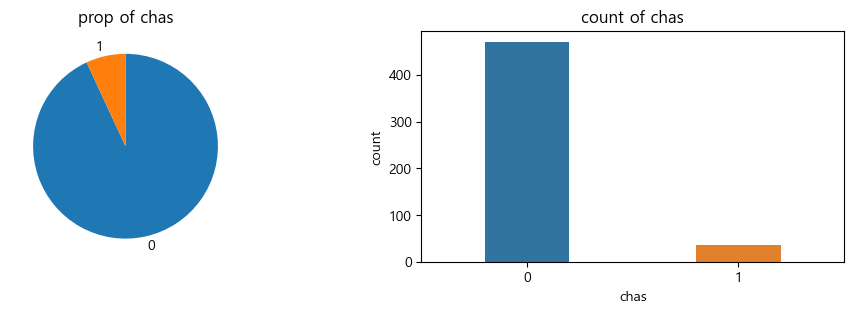

In [231]:
fig,axes = plt.subplots(1,2,figsize=(12,3))

ax1,ax2 = axes

ax1.pie(p_t.proportion,labels=p_t.chas,startangle=90,counterclock=False)
ax1.set_title("prop of chas")
sns.countplot(x=data.chas,ax=ax2,width=0.4)
ax2.set_title("count of chas")

## 소감

* 확실히 나는 데이터를 보고 인사이트를 도출하는 능력이 떨어진다.

* 비즈니즈적 의사결정을 위해선 많은 도메인에서의 지식이 필요한 것 같다....

* 다른 에이블러님들이 인사이트를 도출하시는 것들을 보고 많이 반성했다....

* 데이터를 잘 다루는 것은 누구나 할 수 있는거라고 생각하나 인사이트를 도출하기 위해선 평소에 다양한 분야에 관심을 가져야 할 필요성을 느꼈다.

* 부족한점을 알고 있었지만, 오늘 더 뼈저리게 느낀것 같다...